In [1]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.passes import SabreLayout, SetLayout, SabreSwap, RemoveFinalMeasurements
from qiskit.converters import circuit_to_dag, dag_to_circuit

Select circuit

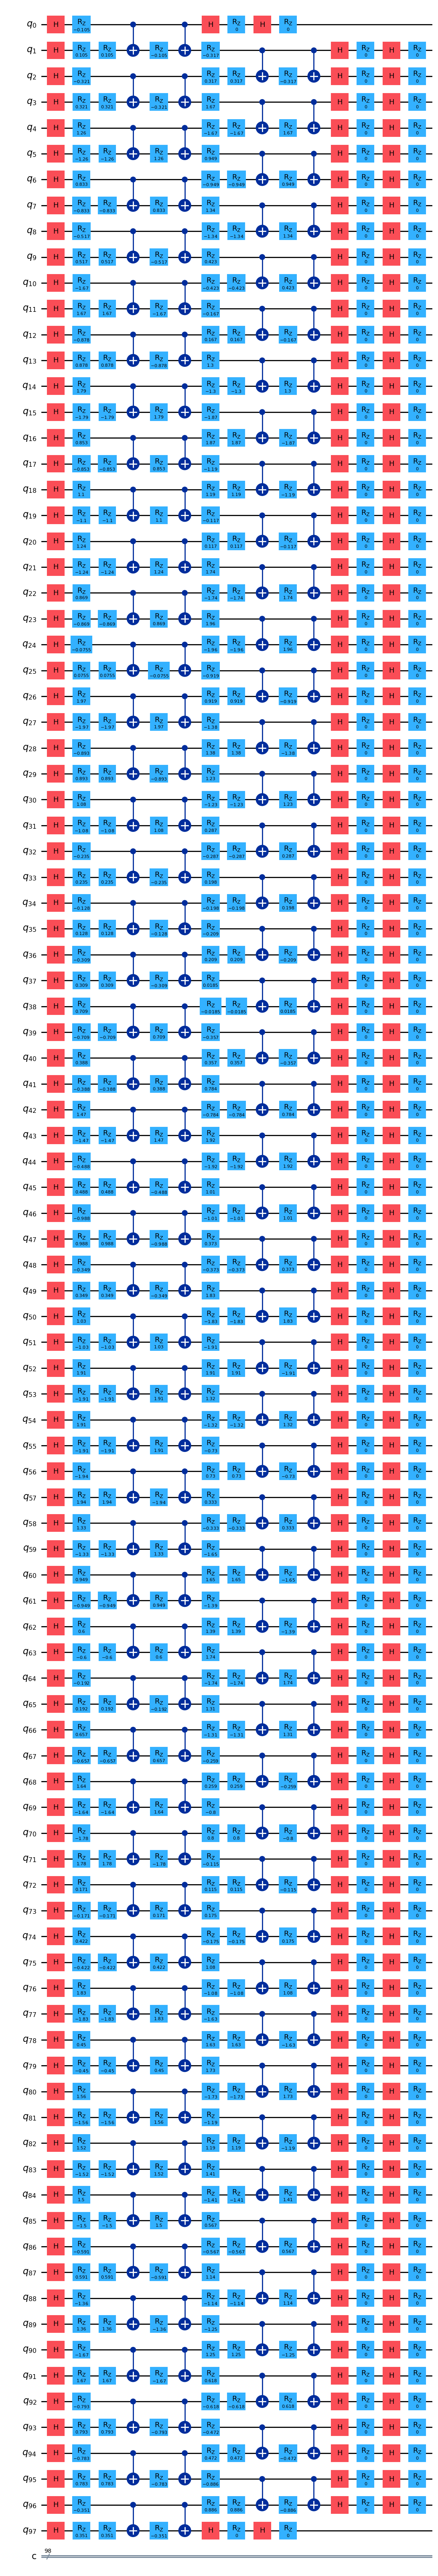

In [2]:
filename = "circuits/ising_n98.qasm"
qc = QuantumCircuit.from_qasm_file(filename)
qc_dag = circuit_to_dag(qc)
qc_dag = RemoveFinalMeasurements().run(qc_dag)
qc = dag_to_circuit(qc_dag)
qc.draw('mpl', fold=-1)

Select coupling map

In [3]:
from qiskit_ibm_runtime.fake_provider.backends.sherbrooke import FakeSherbrooke
fake_eagle = FakeSherbrooke()
coupling = fake_eagle.coupling_map
device = CouplingMap(couplinglist=coupling)
device.make_symmetric()

Prepare circuit with enough qubits

In [4]:
num_program_qubit=qc.num_qubits
num_classical_bits=qc.num_clbits
num_physical_qubit=max(max(i) for i in coupling)+1
if num_physical_qubit>num_program_qubit:
    temp_qc=QuantumCircuit(num_physical_qubit,num_classical_bits)
    temp_qc.compose(qc,inplace=True)
    qc=temp_qc

Setup

In [5]:
random_seed = 1
number_of_trial = 2500
initial_layout_list=None

# Sabre layout method

In [6]:
sabre_layout = SabreLayout(coupling_map = device, seed = random_seed, layout_trials=number_of_trial, skip_routing=False)
if not initial_layout_list is None:
    layout_list=[]
    for mapping in initial_layout_list:
        layout = Layout({qc.qubits[logical]: physical for logical, physical in mapping.items()})
        layout_list.append(layout)
    sabre_layout.property_set['sabre_starting_layouts'] = layout_list

In [7]:
out_dag = sabre_layout.run(circuit_to_dag(qc))
sabre_cir = dag_to_circuit(out_dag)
initial_layout = sabre_layout.property_set["layout"]
initial_mapping={}
for program, physical in initial_layout.get_virtual_bits().items():
    initial_mapping[program._index]=physical

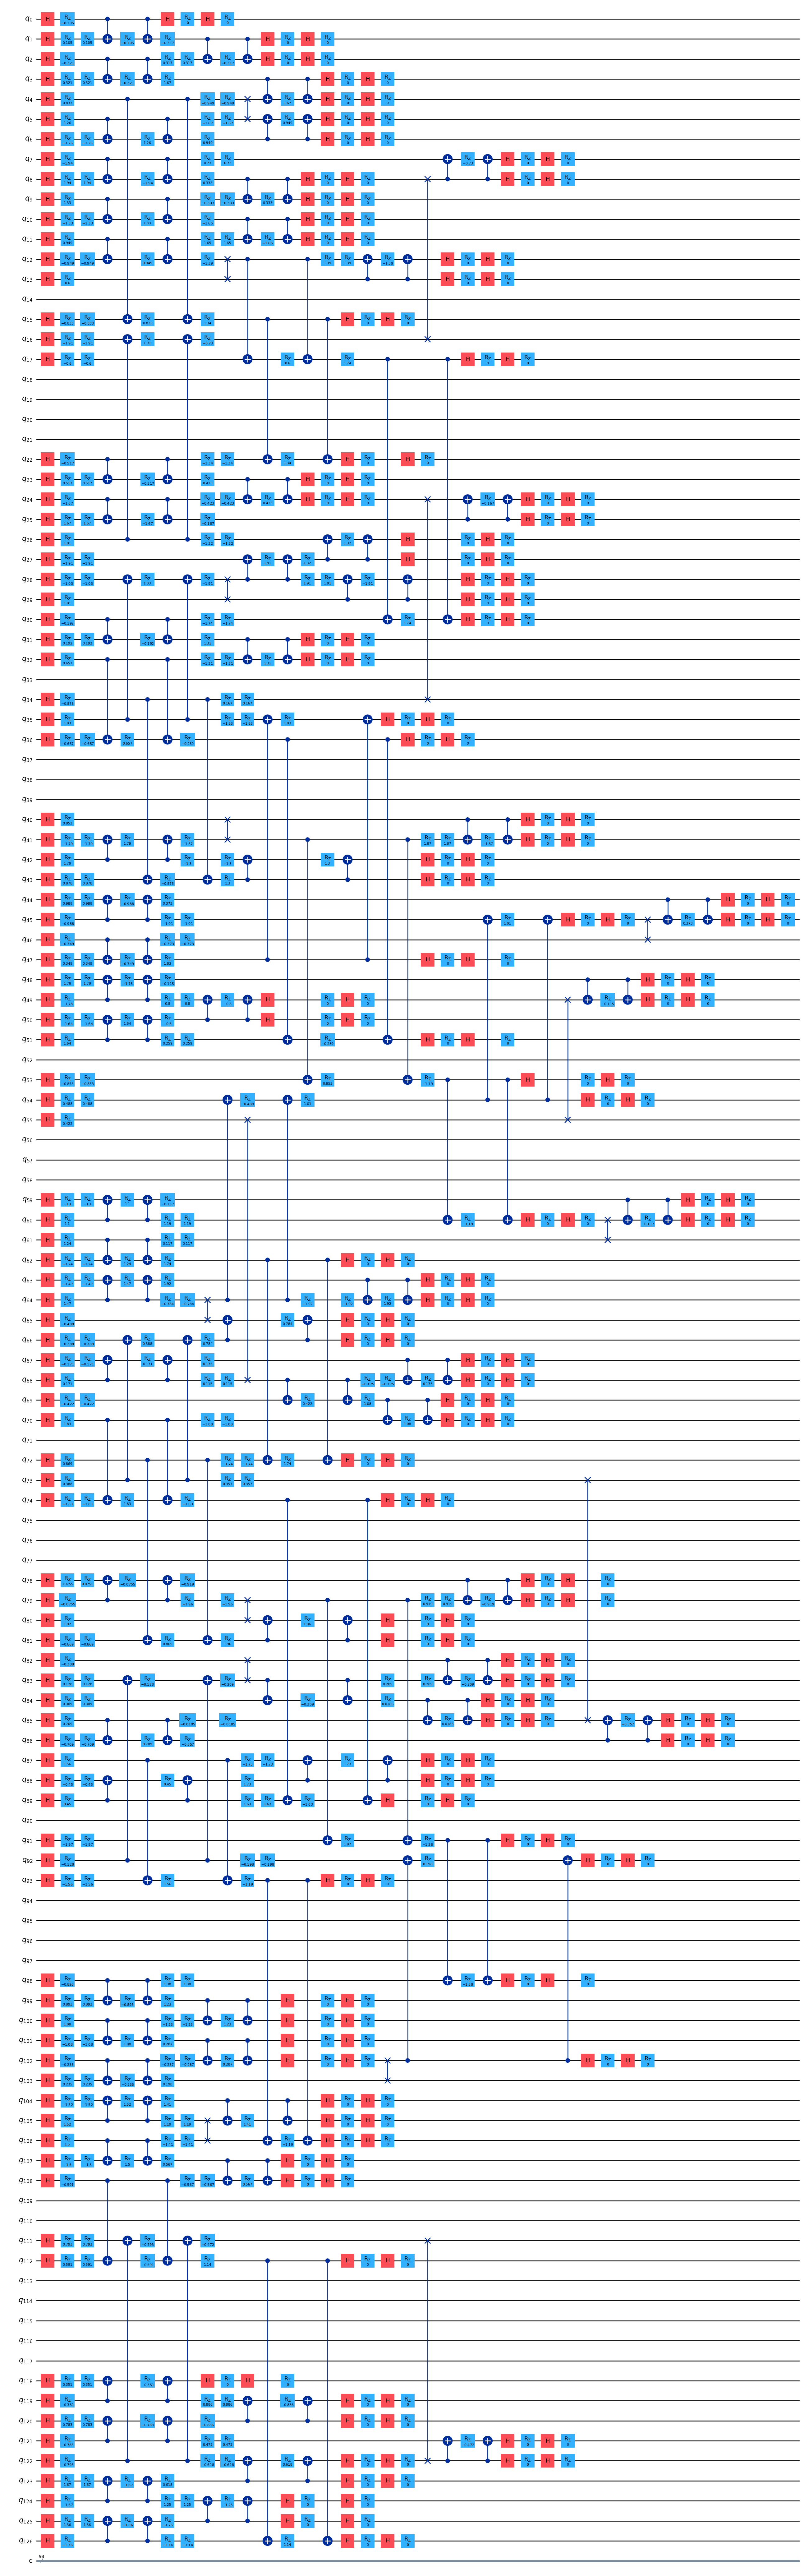

In [8]:
sabre_cir.draw('mpl', fold=-1)

In [9]:
initial_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 5,
 5: 6,
 6: 4,
 7: 15,
 8: 22,
 9: 23,
 10: 24,
 11: 25,
 12: 34,
 13: 43,
 14: 42,
 15: 41,
 16: 40,
 17: 53,
 18: 60,
 19: 59,
 20: 61,
 21: 62,
 22: 72,
 23: 81,
 24: 79,
 25: 78,
 26: 80,
 27: 91,
 28: 98,
 29: 99,
 30: 100,
 31: 101,
 32: 102,
 33: 103,
 34: 92,
 35: 83,
 36: 82,
 37: 84,
 38: 85,
 39: 86,
 40: 73,
 41: 66,
 42: 64,
 43: 63,
 44: 65,
 45: 54,
 46: 45,
 47: 44,
 48: 46,
 49: 47,
 50: 35,
 51: 28,
 52: 29,
 53: 27,
 54: 26,
 55: 16,
 56: 7,
 57: 8,
 58: 9,
 59: 10,
 60: 11,
 61: 12,
 62: 13,
 63: 17,
 64: 30,
 65: 31,
 66: 32,
 67: 36,
 68: 51,
 69: 50,
 70: 49,
 71: 48,
 72: 68,
 73: 67,
 74: 55,
 75: 69,
 76: 70,
 77: 74,
 78: 89,
 79: 88,
 80: 87,
 81: 93,
 82: 105,
 83: 104,
 84: 106,
 85: 107,
 86: 108,
 87: 112,
 88: 126,
 89: 125,
 90: 124,
 91: 123,
 92: 122,
 93: 111,
 94: 121,
 95: 120,
 96: 119,
 97: 118,
 98: 110,
 99: 117,
 100: 116,
 101: 115,
 102: 114,
 103: 113,
 104: 109,
 105: 96,
 106: 97,
 107: 95,
 108: 94,
 10

# Pass Manager Method

In [10]:
pm = generate_preset_pass_manager(optimization_level=3, coupling_map=device, seed_transpiler=random_seed)

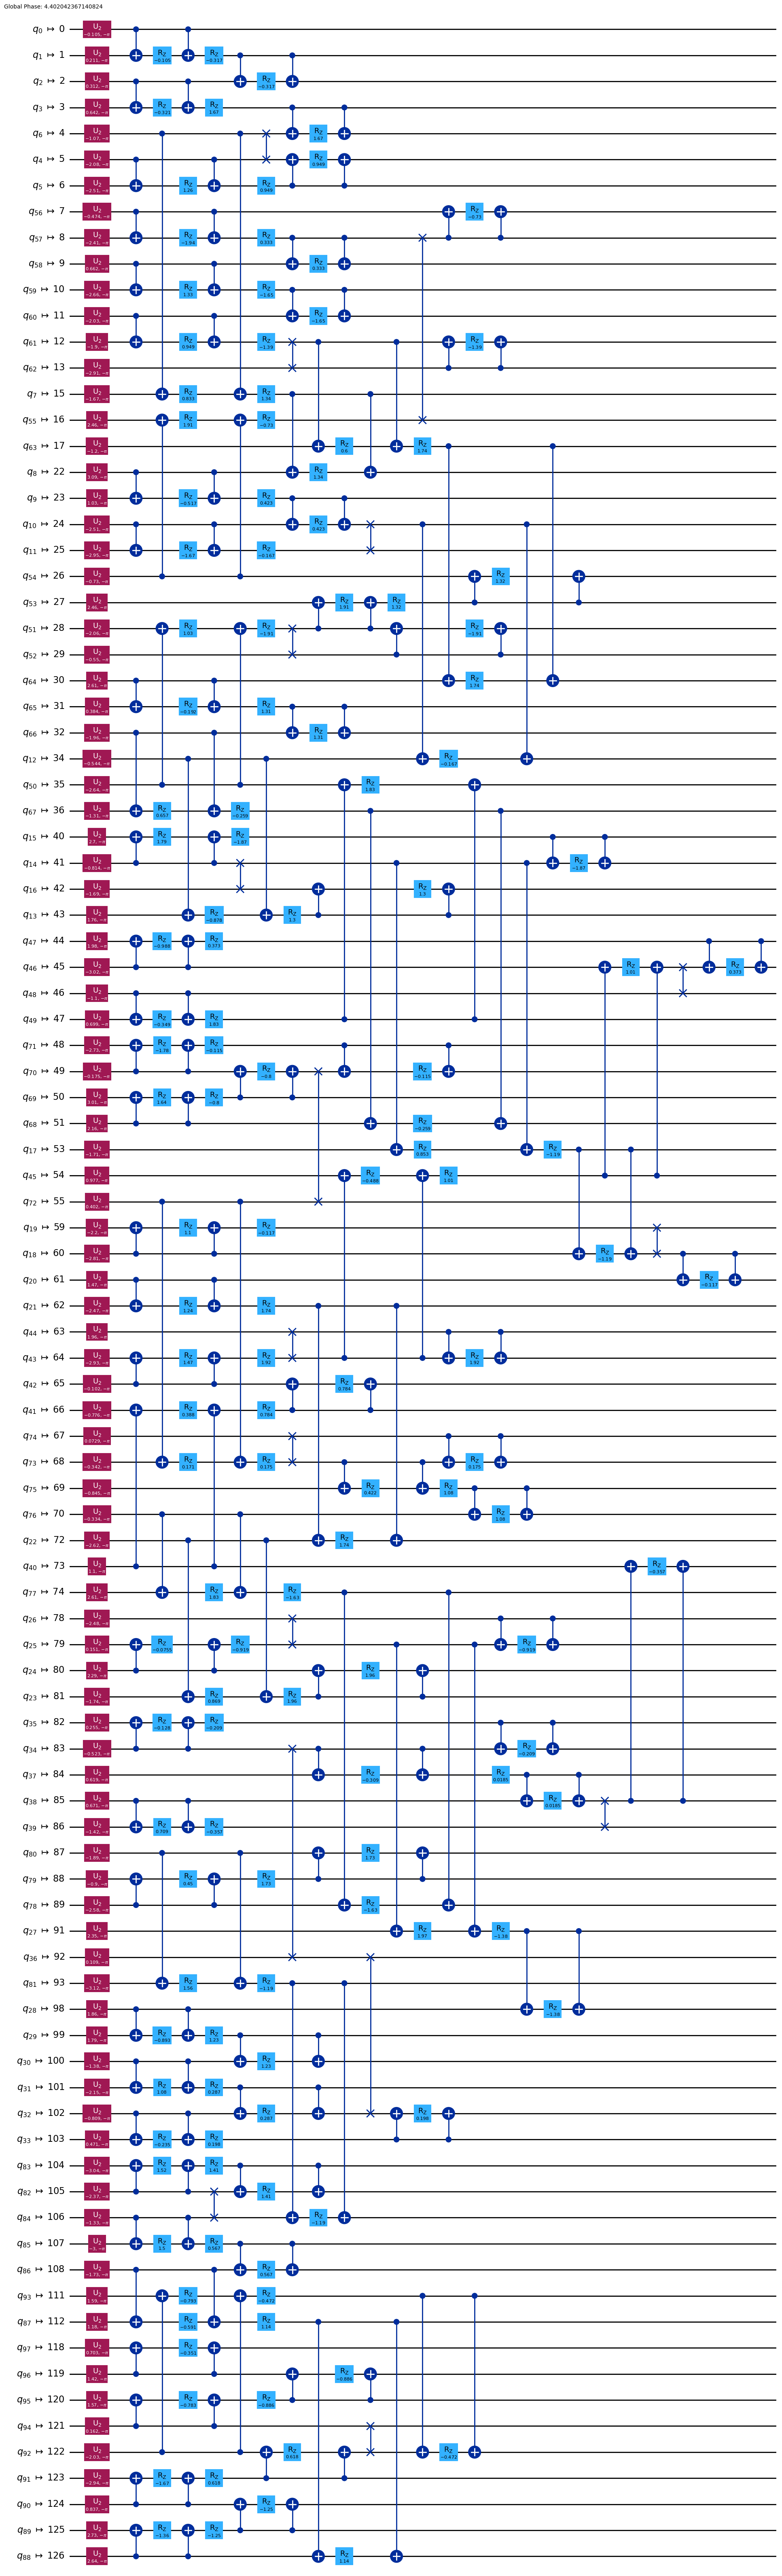

In [11]:
sabre_cir = pm.run(qc)
sabre_cir.draw('mpl', fold=-1)

In [12]:
initial_layout = sabre_cir.layout.initial_layout
initial_mapping={}
for program, physical in initial_layout.get_virtual_bits().items():
    initial_mapping[program._index]=physical

In [13]:
initial_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 5,
 5: 6,
 6: 4,
 7: 15,
 8: 22,
 9: 23,
 10: 24,
 11: 25,
 12: 34,
 13: 43,
 14: 41,
 15: 40,
 16: 42,
 17: 53,
 18: 60,
 19: 59,
 20: 61,
 21: 62,
 22: 72,
 23: 81,
 24: 80,
 25: 79,
 26: 78,
 27: 91,
 28: 98,
 29: 99,
 30: 100,
 31: 101,
 32: 102,
 33: 103,
 34: 83,
 35: 82,
 36: 92,
 37: 84,
 38: 85,
 39: 86,
 40: 73,
 41: 66,
 42: 65,
 43: 64,
 44: 63,
 45: 54,
 46: 45,
 47: 44,
 48: 46,
 49: 47,
 50: 35,
 51: 28,
 52: 29,
 53: 27,
 54: 26,
 55: 16,
 56: 7,
 57: 8,
 58: 9,
 59: 10,
 60: 11,
 61: 12,
 62: 13,
 63: 17,
 64: 30,
 65: 31,
 66: 32,
 67: 36,
 68: 51,
 69: 50,
 70: 49,
 71: 48,
 72: 55,
 73: 68,
 74: 67,
 75: 69,
 76: 70,
 77: 74,
 78: 89,
 79: 88,
 80: 87,
 81: 93,
 82: 105,
 83: 104,
 84: 106,
 85: 107,
 86: 108,
 87: 112,
 88: 126,
 89: 125,
 90: 124,
 91: 123,
 92: 122,
 93: 111,
 94: 121,
 95: 120,
 96: 119,
 97: 118,
 98: 110,
 99: 117,
 100: 116,
 101: 115,
 102: 114,
 103: 113,
 104: 109,
 105: 96,
 106: 97,
 107: 95,
 108: 94,
 10